### Storytelling Data Visualization on Exchange Rates 

In [1]:
import pandas as pd

exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

print(exchange_rates.head())
print(exchange_rates.tail())
exchange_rates.info()

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

The dataframe contains 5699 rows and 41 columns. 
3 columns contain float values and 38 the object (string) values.
There are mutch 'null' values as well

# Data Cleaning

We will focus on USD currency. 
Let's isolate the 'US dollar' column and give it a better name.
Also we need to convert the 'Time' columns (which has object type) to 'datetime' type, so we can work forward with it.

In [2]:
exchange_rates.rename(columns = {'[US dollar ]': 'US_dollar',
                                 'Period\\Unit:': 'Time'},
                                  inplace = True)

exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace = True)
exchange_rates.reset_index(drop = True, inplace = True)

In this project I keep focus on data about US_dollar, so let's isolate the columns we will use forward. 

In [3]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.0867     6
          ..
1.1877     1
1.0405     1
1.3553     1
1.4747     1
1.2102     1
Name: US_dollar, Length: 3528, dtype: int64

One thing is wrong. I see '-' value 62 times in our dataframe. Actually we don't need this value because I can't do anything with that. 

In [4]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'].str.contains('-') == False]
euro_to_dollar['US_dollar'].value_counts()

1.2276    9
1.1215    8
1.1305    7
1.0867    6
1.3532    6
         ..
0.8829    1
1.4194    1
0.9240    1
1.0264    1
1.2159    1
Name: US_dollar, Length: 3527, dtype: int64

Lets convert the values of US_dollar column to float type.

In [5]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

There are to much valueas to make a clear readable plot. I sugegst to calculate the mean value of USD per month and work forward with course based per month.

In [6]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

### Coming up with idea

I want to visualize the changes of euro to dollar course during 2006 - 2009 because of finance crisis between 2007-2008. My idea is to compare the behaviour between the years during the crisis and after that.

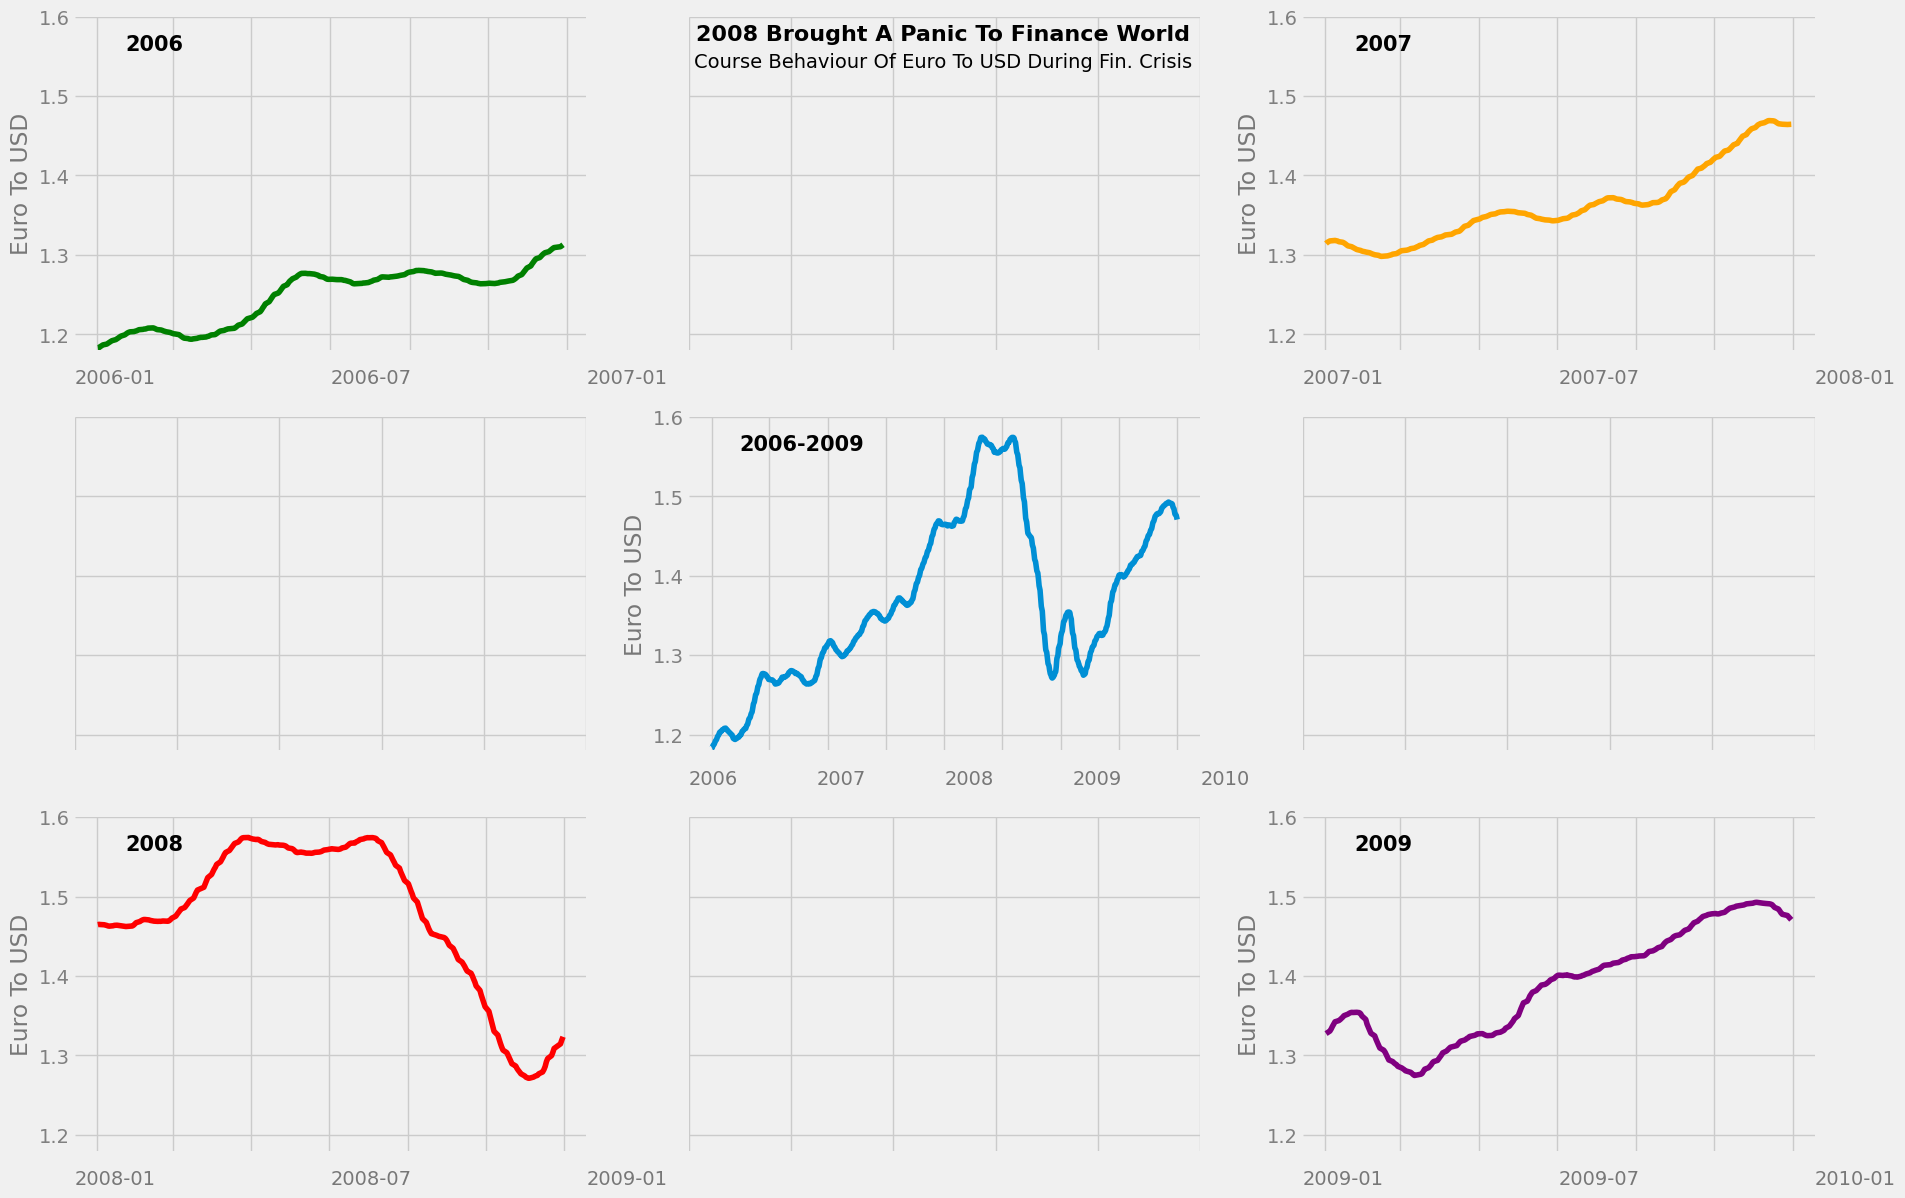

In [7]:
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

style.use('fivethirtyeight')

fig, ((ax1, ax2, ax3),
      (ax4, ax5, ax6),
      (ax7, ax8, ax9)) = plt.subplots(nrows = 3,
                        ncols = 3,
                        figsize = (20, 14))

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

for ax in axes:
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(left = False, bottom = False)
    ax.tick_params(axis = 'x', rotation = 30)
    ax.tick_params(axis = 'y', colors = '#808080')
    ax.set_ylim(1.18, 1.6)
    ax.set_ylabel('Euro To USD', alpha = 0.5)
    
# Empty axes

empty_axes = [ax2, ax4, ax6, ax8]

for ax in empty_axes:
    ax.set_xticklabels([])        
    ax.set_yticklabels([])
    ax.set_ylabel('')

# ax1 - 2006

ax_2006 = euro_to_dollar[euro_to_dollar['Time'].dt.year == 2006]
ax1.plot(ax_2006['Time'], ax_2006['rolling_mean'], color = 'green')
ax1.text(x = 0.1, y = 0.9, transform = ax1.transAxes, s = '2006', size = 15, weight = 'bold')
ax1.set_xticklabels([])
ax1.text(x = 0, y = -0.1, s = '2006-01', transform = ax1.transAxes, alpha = 0.5)
ax1.text(x = 0.5, y = -0.1, s = '2006-07', transform = ax1.transAxes, alpha = 0.5)
ax1.text(x = 1, y = -0.1, s = '2007-01', transform = ax1.transAxes, alpha = 0.5)

# Title placed om ax2 
ax2.text(x = 0.015, y = 0.93,
         s = '2008 Brought A Panic To Finance World',
         transform = ax2.transAxes, size = 16, weight = 'bold')

ax2.text(x = 0.01, y = 0.85,
         s = 'Course Behaviour Of Euro To USD During Fin. Crisis',
         transform = ax2.transAxes, size = 14)

# ax3 - 2007

ax_2007 = euro_to_dollar[euro_to_dollar['Time'].dt.year == 2007]
ax3.plot(ax_2007['Time'], ax_2007['rolling_mean'], color = 'orange')
ax3.text(x = 0.1, y = 0.9, transform = ax3.transAxes, s = '2007', size = 15, weight = 'bold')
ax3.set_xticklabels([])
ax3.text(x = 0, y = -0.1, s = '2007-01', transform = ax3.transAxes, alpha = 0.5)
ax3.text(x = 0.5, y = -0.1, s = '2007-07', transform = ax3.transAxes, alpha = 0.5)
ax3.text(x = 1, y = -0.1, s = '2008-01', transform = ax3.transAxes, alpha = 0.5)

# ax5 - 2006/2009
ax_all = euro_to_dollar[euro_to_dollar['Time'].dt.year.astype(int).between(2006,2009)]
ax5.plot(ax_all['Time'], ax_all['rolling_mean'])
ax5.text(x = 0.1, y = 0.9, transform = ax5.transAxes, s = '2006-2009', size = 15, weight = 'bold')
ax5.set_xticklabels([])
ax5.text(x = 0.0, y = -0.1, s = '2006', alpha = 0.5, transform = ax5.transAxes)
ax5.text(x = 0.25, y = -0.1, s = '2007', alpha = 0.5, transform = ax5.transAxes)
ax5.text(x = 0.5, y = -0.1, s = '2008', alpha = 0.5, transform = ax5.transAxes)
ax5.text(x = 0.75, y = -0.1, s = '2009', alpha = 0.5, transform = ax5.transAxes)
ax5.text(x = 1, y = -0.1, s = '2010', alpha = 0.5, transform = ax5.transAxes)



# ax7 - 2008

ax_2008 = euro_to_dollar[euro_to_dollar['Time'].dt.year == 2008]
ax7.plot(ax_2008['Time'], ax_2008['rolling_mean'], color = 'red')
ax7.text(x = 0.1, y = 0.9, transform = ax7.transAxes, s = '2008', size = 15, weight = 'bold')
ax7.set_xticklabels([])
ax7.text(x = 0, y = -0.1, s = '2008-01', transform = ax7.transAxes, alpha = 0.5)
ax7.text(x = 0.5, y = -0.1, s = '2008-07', transform = ax7.transAxes, alpha = 0.5)
ax7.text(x = 1, y = -0.1, s = '2009-01', transform = ax7.transAxes, alpha = 0.5)

# ax9 - 2009

ax_2009 = euro_to_dollar[euro_to_dollar['Time'].dt.year == 2009]
ax9.plot(ax_2009['Time'], ax_2009['rolling_mean'], color = 'purple')
ax9.text(x = 0.1, y = 0.9, transform = ax9.transAxes, s = '2009', size = 15, weight = 'bold')
ax9.set_xticklabels([])
ax9.text(x = 0, y = -0.1, s = '2009-01', transform = ax9.transAxes, alpha = 0.5)
ax9.text(x = 0.5, y = -0.1, s = '2009-07', transform = ax9.transAxes, alpha = 0.5)
ax9.text(x = 1, y = -0.1, s = '2010-01', transform = ax9.transAxes, alpha = 0.5)

plt.show()

### Summary of analysis and visualization

Here above you can see 5 separates graphs. 4 graphs per year and a main one with during all 4 years together.
We can notice that in 2008 the course was the most high and after that we see big drop, which was recovered in couple of monthes.

I can imagine it was a time of panic and unpredictability!

Anywey, thak you for your attention to my work and keep follow me for more prodects during my study!